In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
def load_and_prepare_data(file_path):
    data = pd.read_csv(file_path, sep=";")
    data["count_log"] = np.log2(data["count"])
    data["day_index"] = data.index
    data["count_diff"] = data["count"].diff()
    data["deaths_diff"] = data["deaths"].diff()
    return data

In [3]:
def create_model(data):
    model = LinearRegression()
    trainedModel = model.fit(data[["day_index"]], data["count_log"])
    return trainedModel

In [4]:
def predict_data(data, model):
    predictedData = pd.DataFrame(np.arange(len(data)), columns = ["day_index"])
    predictedData["estimated_count_log"] = model.predict(predictedData[["day_index"]])
    predictedData["estimated_count"] = np.exp2(predictedData["estimated_count_log"])    
    return predictedData

In [5]:
def create_simulation_data():
    sim = pd.DataFrame(np.arange(16), columns = ["day_index"])
    sim["upper_border"] = np.exp(sim["day_index"] * math.log(2))
    sim["lower_border"] = np.exp(sim["day_index"] * math.log(1.5))    
    return sim

In [6]:
def draw_graphs(data, predictedData):
    plt.plot(data["day_index"], data["count"], color = "blue", marker="o")
    plt.plot(data["day_index"], data["deaths"], color = "red", marker="o")
    plt.plot(data["day_index"], data["count_diff"], color = "black", marker="o")
    plt.plot(predictedData["day_index"], predictedData["estimated_count"], color = "green")

    #plt.plot(sim["day_index"], sim["upper_border"], color = "black", linewidth=1)
    #plt.plot(sim["day_index"], sim["lower_border"], color = "black", linewidth=1)

    plt.grid(color='gray', linestyle='-', linewidth=1)
    plt.show()

In [7]:
def calculate_grow_ratio(model):
    coef = model.coef_[0]
    ratio = math.exp(coef * math.log(2))
    return ratio

In [8]:
def just_do_it():
    data = load_and_prepare_data('d:/data/kw.csv')
    model = create_model(data)
    predictedData = predict_data(data, model)
    draw_graphs(data, predictedData)
    ratio = calculate_grow_ratio(model)
    return (data, model, predictedData, ratio)

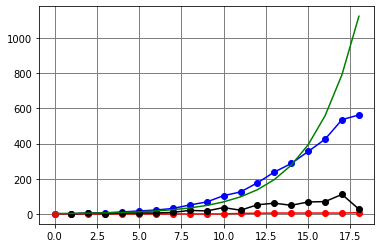

,date,count,deaths,recovered,count_log,day_index,count_diff,deaths_diff
0,2020.03.04,1,0,0,0.000000,0,NaN,NaN
1,2020.03.05,1,0,0,0.000000,1,0.0,0.0
2,2020.03.06,5,0,0,2.321928,2,4.0,0.0
3,2020.03.07,6,0,0,2.584963,3,1.0,0.0
4,2020.03.08,11,0,0,3.459432,4,5.0,0.0
5,2020.03.09,17,0,0,4.087463,5,6.0,0.0
6,2020.03.10,22,0,0,4.459432,6,5.0,0.0
7,2020.03.11,31,0,0,4.954196,7,9.0,0.0
8,2020.03.12,51,0,0,5.672425,8,20.0,0.0
9,2020.03.13,68,0,0,6.087463,9,17.0,0.0


In [9]:
data, model, predictedData, ratio = just_do_it()
data

In [10]:
ratio

1.4190028277967197